<a href="https://colab.research.google.com/github/yeseul515/Kimyeseul/blob/Project/%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90_%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_FN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prophet

## 1. 삼성전자 주가 데이터 불러오기

In [2]:
# yfinance를 활용하여 종목코드를 넣고 데이터 가져오기
import yfinance as yf
import pandas as pd
from pandas_datareader import data
from prophet import Prophet

yf.pdr_override()

# 기간 설정하기(5년 1개월)
start_date = "2018-11-01"
end_date = "2023-12-01"
samsung = data.get_data_yahoo("005930.KS", start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


## 2. Train 데이터 분리 후 필요없는 컬럼 삭제하기

In [3]:
# train 데이터 분리하기
train_samsung = samsung[:"2023-10-31"]

# dataframe 형식 맞추기
df = pd.DataFrame({'ds':train_samsung.index, 'y':train_samsung['Close']})
df.reset_index(inplace = True)

# 필요 없는 부분 삭제하기
del df['Date']

## 3. Prophet 모델을 생성하고 학습

In [4]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

# 주말을 제외한 평일을 이용하여(freq = 'B') 미래의 주식 시장 영업일 생성
future = m.make_future_dataframe(periods=22, freq = 'B')

# Prophet 모델을 이용하여 주말을 제외한 평일에 대한 예측
forecast = m.predict(future)
forecast

DEBUG:cmdstanpy:input tempfile: /tmp/tmpw4j4zda_/6gofem4x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw4j4zda_/cxvcmunt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1425', 'data', 'file=/tmp/tmpw4j4zda_/6gofem4x.json', 'init=/tmp/tmpw4j4zda_/cxvcmunt.json', 'output', 'file=/tmp/tmpw4j4zda_/prophet_modelifj8o0af/prophet_model-20240101111222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-11-01,41631.044000,35294.255547,42091.740708,41631.044000,41631.044000,-2766.784510,-2766.784510,-2766.784510,-649.7764,...,-81.090373,-81.090373,-81.090373,-2035.917737,-2035.917737,-2035.917737,0.0,0.0,0.0,38864.259490
1,2018-11-02,41634.537916,36064.005230,42353.226781,41634.537916,41634.537916,-2603.960285,-2603.960285,-2603.960285,-649.7764,...,-45.428448,-45.428448,-45.428448,-1908.755436,-1908.755436,-1908.755436,0.0,0.0,0.0,39030.577632
2,2018-11-05,41645.019665,36203.214252,42520.446471,41645.019665,41645.019665,-2280.766287,-2280.766287,-2280.766287,-649.7764,...,-73.417024,-73.417024,-73.417024,-1557.572863,-1557.572863,-1557.572863,0.0,0.0,0.0,39364.253379
3,2018-11-06,41648.513582,36342.834238,42774.348432,41648.513582,41648.513582,-2033.214679,-2033.214679,-2033.214679,-649.7764,...,68.090644,68.090644,68.090644,-1451.528923,-1451.528923,-1451.528923,0.0,0.0,0.0,39615.298902
4,2018-11-07,41652.007498,36380.160813,42866.186980,41652.007498,41652.007498,-2031.454364,-2031.454364,-2031.454364,-649.7764,...,-30.598861,-30.598861,-30.598861,-1351.079103,-1351.079103,-1351.079103,0.0,0.0,0.0,39620.553134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,2023-11-24,75139.480041,70931.662487,77533.618681,75061.782424,75246.426871,-872.435477,-872.435477,-872.435477,-649.7764,...,-45.428448,-45.428448,-45.428448,-177.230628,-177.230628,-177.230628,0.0,0.0,0.0,74267.044564
1249,2023-11-27,75269.551258,71264.162953,77942.785593,75169.969348,75399.759665,-737.863652,-737.863652,-737.863652,-649.7764,...,-73.417024,-73.417024,-73.417024,-14.670228,-14.670228,-14.670228,0.0,0.0,0.0,74531.687606
1250,2023-11-28,75312.908330,71649.697661,78160.485964,75190.754070,75463.260192,-546.605969,-546.605969,-546.605969,-649.7764,...,68.090644,68.090644,68.090644,35.079787,35.079787,35.079787,0.0,0.0,0.0,74766.302361
1251,2023-11-29,75356.265402,71385.058196,78143.451962,75210.979937,75556.002735,-598.447152,-598.447152,-598.447152,-649.7764,...,-30.598861,-30.598861,-30.598861,81.928108,81.928108,81.928108,0.0,0.0,0.0,74757.818250


## 4. 종가 데이터 시각화하기

<Axes: xlabel='Date'>

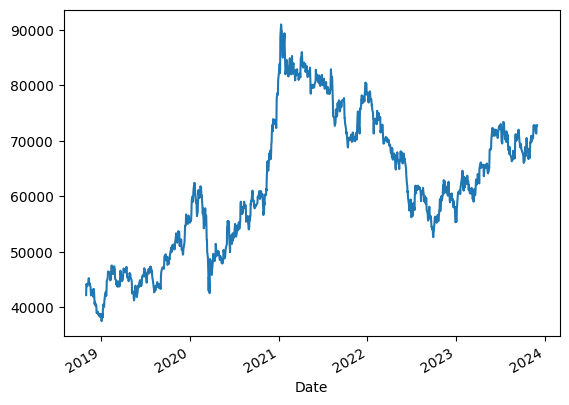

In [5]:
samsung["Close"].plot()

## 5. 예측 그래프 시각화하기

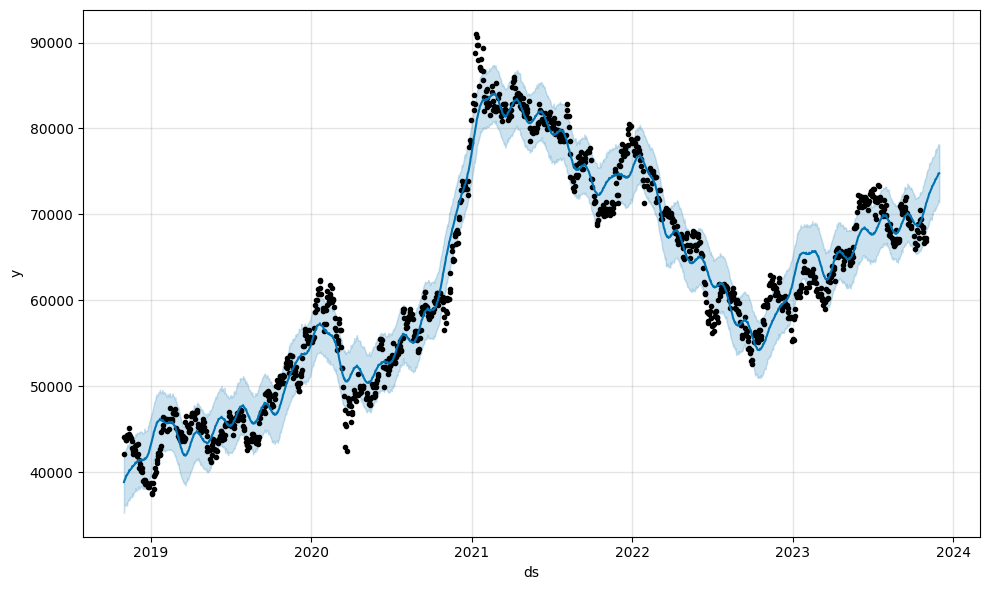

In [14]:
import matplotlib.pyplot as plt
fig = m.plot(forecast, uncertainty=True)
plt.show()

## 6. 성분 별로 분해해서 살펴보기

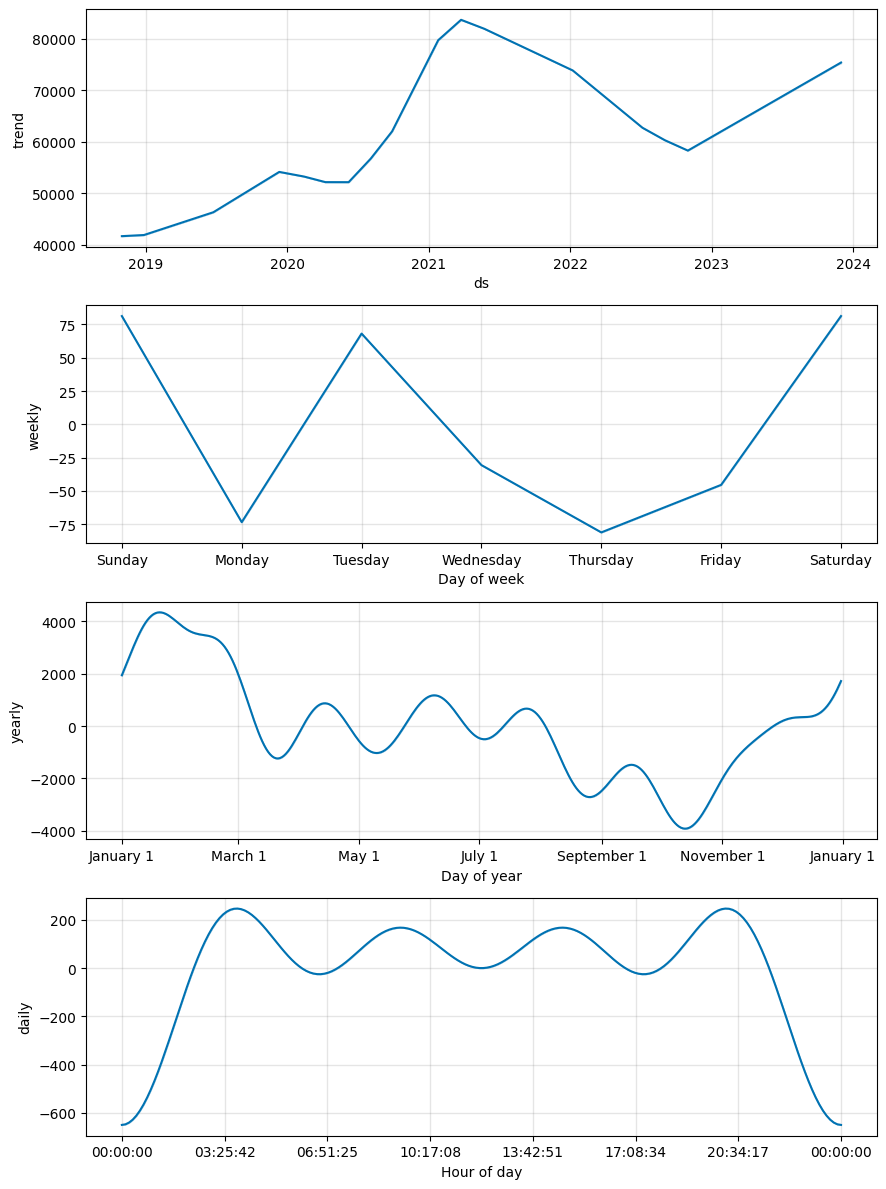

In [15]:
fig = m.plot_components(forecast)
plt.show()

## 7. 실제 및 예측 주가 그래프 시각화하기

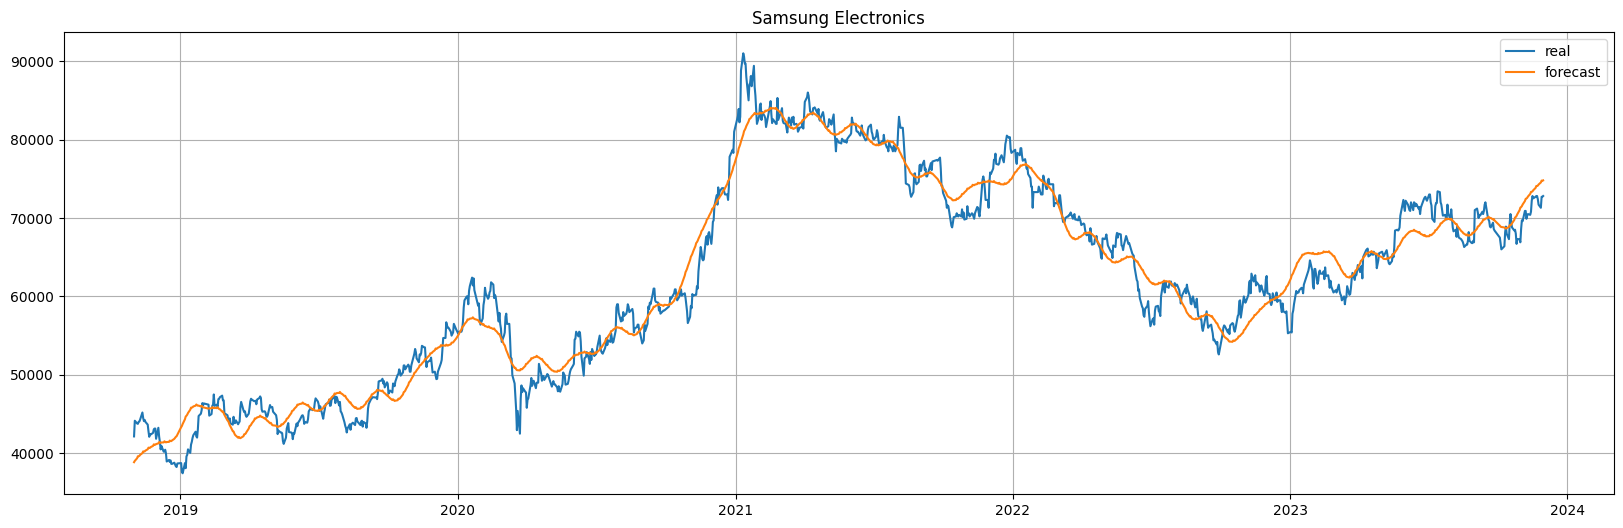

In [16]:
plt.figure(figsize=(20,6))
plt.plot(samsung.index,samsung["Close"], label="real")
plt.plot(forecast["ds"],forecast["yhat"], label="forecast")
plt.title("Samsung Electronics")
plt.grid(True)
plt.legend()
plt.show()

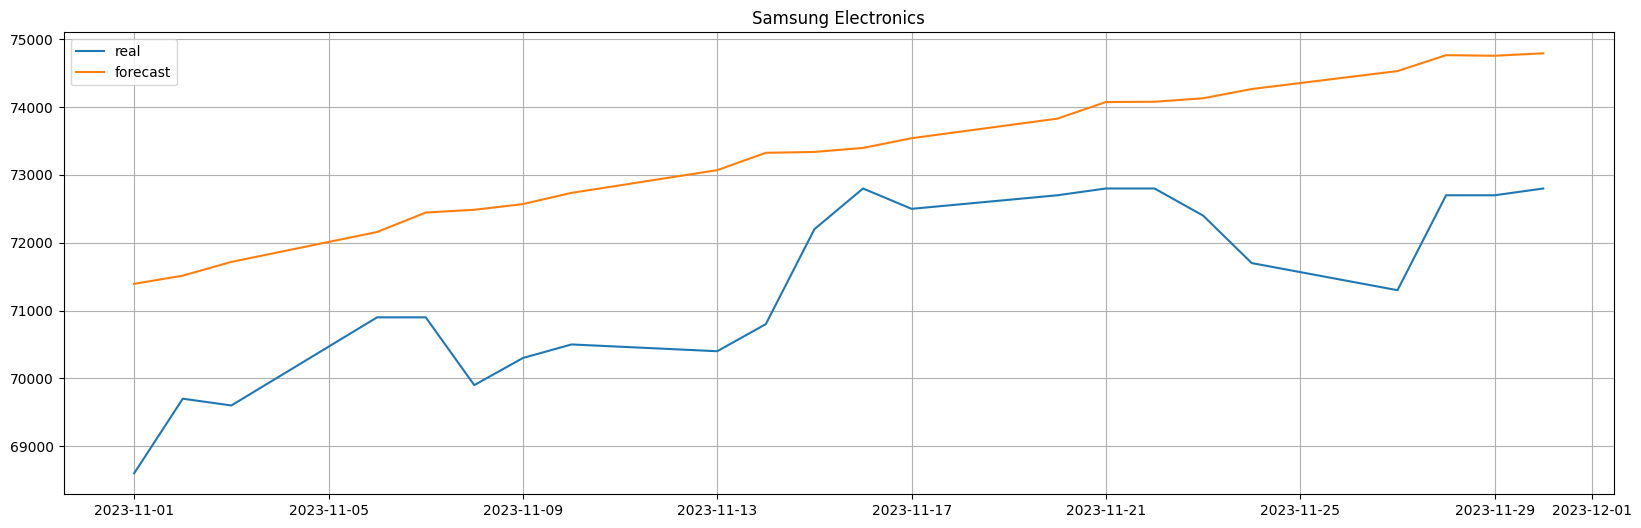

In [31]:
plt.figure(figsize=(20,6))
plt.plot(samsung.index[1231:], samsung["Close"][1231:], label="real")
plt.plot(forecast["ds"][1231:],forecast["yhat"][1231:], label="forecast")
plt.title("Samsung Electronics")
plt.grid(True)
plt.legend()
plt.show()

## 8. 모델 정확도 평가

In [32]:
# 훈련한 데이터셋과 예측한 데이터셋을 각각 train_df와 prediction_df에 할당
train_df = samsung.tail(22)
prediction_df = forecast.tail(22)

# 전날 대비 주가 상승 여부를 나타내는 열 추가
train_df['Price_Increase'] = (train_df['Close'] > train_df['Close'].shift(1)).astype(int)
prediction_df['Price_Increase'] = (prediction_df['yhat'] > prediction_df['yhat'].shift(1)).astype(int)

# 전날 대비 주가가 올랐으면 1, 아니면 0으로 값을 부여
train_df['Price_Increase'] = train_df['Price_Increase'].fillna(0).astype(int)
prediction_df['Price_Increase'] = prediction_df['Price_Increase'].fillna(0).astype(int)

# 결과 확인
print(train_df[['Close', 'Price_Increase']])
print(prediction_df[['yhat', 'Price_Increase']])

# train_df와 prediction_df의 인덱스 리셋
train_df.reset_index(drop=True, inplace=True)
prediction_df.reset_index(drop=True, inplace=True)

# train_df와 prediction_df의 'Price_Increase' 열이 같은 값을 가진 행의 개수 구하기
matching_rows = (train_df['Price_Increase'] == prediction_df['Price_Increase']).sum()

print(f"두 데이터프레임에서 'Price_Increase' 값이 일치하는 행의 개수: {matching_rows}")

              Close  Price_Increase
Date                               
2023-11-01  68600.0               0
2023-11-02  69700.0               1
2023-11-03  69600.0               0
2023-11-06  70900.0               1
2023-11-07  70900.0               0
2023-11-08  69900.0               0
2023-11-09  70300.0               1
2023-11-10  70500.0               1
2023-11-13  70400.0               0
2023-11-14  70800.0               1
2023-11-15  72200.0               1
2023-11-16  72800.0               1
2023-11-17  72500.0               0
2023-11-20  72700.0               1
2023-11-21  72800.0               1
2023-11-22  72800.0               0
2023-11-23  72400.0               0
2023-11-24  71700.0               0
2023-11-27  71300.0               0
2023-11-28  72700.0               1
2023-11-29  72700.0               0
2023-11-30  72800.0               1
              yhat  Price_Increase
1231  71393.501290               0
1232  71514.640326               1
1233  71717.276015             

<ipython-input-32-c4423a8397a5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Price_Increase'] = (train_df['Close'] > train_df['Close'].shift(1)).astype(int)
<ipython-input-32-c4423a8397a5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_df['Price_Increase'] = (prediction_df['yhat'] > prediction_df['yhat'].shift(1)).astype(int)
<ipython-input-32-c4423a8397a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [58]:
total_predictions = len(train_df)-1
accuracy = matching_rows / total_predictions
print(f'상승, 하락 여부 예측 정확도 비율: {accuracy * 100:.2f}%')

상승, 하락 여부 예측 정확도 비율: 61.90%


# ARIMA

## 1. 데이터 가져오기

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


samsung = yf.download('005930.KS',
                      start='2018-11-01',
                      end='2023-12-01',
                      progress=False)
samsung

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-01,42450.0,42950.0,42150.0,42150.0,36764.195312,13423132
2018-11-02,43050.0,44250.0,42800.0,44150.0,38508.652344,16517112
2018-11-05,43750.0,43800.0,42900.0,43800.0,38203.367188,9426777
2018-11-06,43750.0,43800.0,42950.0,43750.0,38159.761719,7713625
2018-11-07,43600.0,44500.0,43400.0,44000.0,38377.812500,11553998
...,...,...,...,...,...,...
2023-11-24,72400.0,72600.0,71700.0,71700.0,71700.000000,6676685
2023-11-27,71500.0,72100.0,71100.0,71300.0,71300.000000,9113857
2023-11-28,71400.0,72700.0,71300.0,72700.0,72700.000000,13283081


## 2. 데이터 전처리

### ① 종가만 가져오기

In [34]:
samsung_data = samsung['Close']
print(samsung_data)

Date
2018-11-01    42150.0
2018-11-02    44150.0
2018-11-05    43800.0
2018-11-06    43750.0
2018-11-07    44000.0
               ...   
2023-11-24    71700.0
2023-11-27    71300.0
2023-11-28    72700.0
2023-11-29    72700.0
2023-11-30    72800.0
Name: Close, Length: 1253, dtype: float64


### ② 데이터 추세 살펴보기

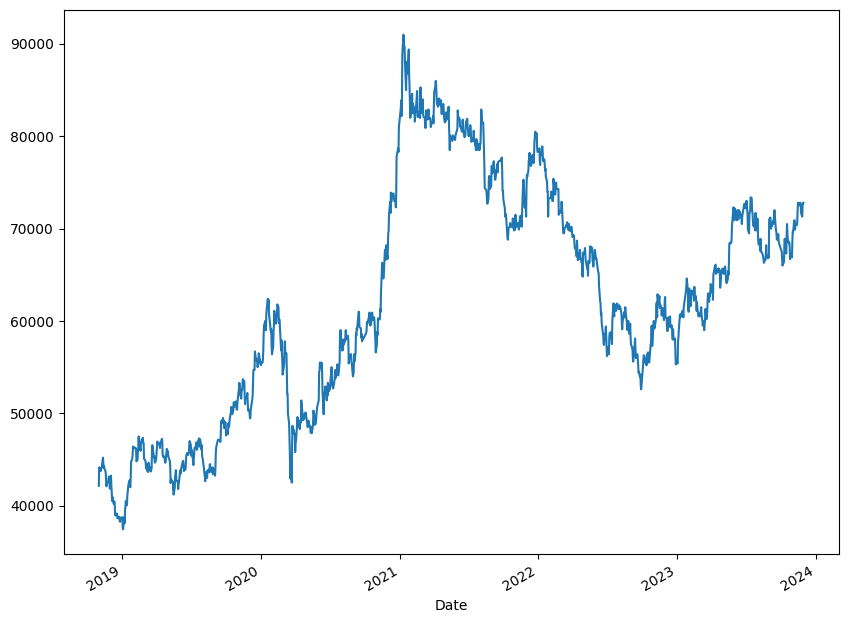

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
samsung_data.plot(ax=ax)
plt.show()

## 3. 이동평균 계산하기

### ① 이동평균 계산

In [36]:
# 30일치 평균내어 이동평균계산

def plot_rolling(data, interval):
    rolmean = data.rolling(interval).mean()
    rolstd = data.rolling(interval).std()
    #Plot rolling statistics:
    plt.figure(figsize=(10, 6))
    plt.xlabel('Date')
    orig = plt.plot(data, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean {}'.format(interval))
    std = plt.plot(rolstd, color='black', label = 'Rolling Std {}'.format(interval))
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

### ② 시각화

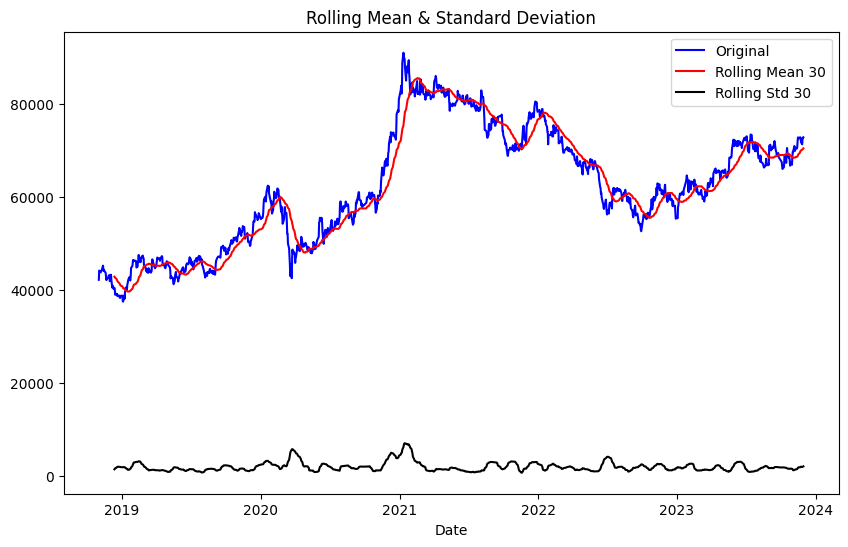

In [37]:
plot_rolling(samsung_data, 30)

## 4. Train / Test 데이터 분할

### ① Train Data

In [38]:
train_data = samsung_data[:1231]
test_data = samsung_data[1231:]

print(train_data)

Date
2018-11-01    42150.0
2018-11-02    44150.0
2018-11-05    43800.0
2018-11-06    43750.0
2018-11-07    44000.0
               ...   
2023-10-25    68000.0
2023-10-26    66700.0
2023-10-27    67300.0
2023-10-30    67300.0
2023-10-31    66900.0
Name: Close, Length: 1231, dtype: float64


### ② Test Data

In [39]:
test_data = samsung_data[1231:]
print(test_data)

Date
2023-11-01    68600.0
2023-11-02    69700.0
2023-11-03    69600.0
2023-11-06    70900.0
2023-11-07    70900.0
2023-11-08    69900.0
2023-11-09    70300.0
2023-11-10    70500.0
2023-11-13    70400.0
2023-11-14    70800.0
2023-11-15    72200.0
2023-11-16    72800.0
2023-11-17    72500.0
2023-11-20    72700.0
2023-11-21    72800.0
2023-11-22    72800.0
2023-11-23    72400.0
2023-11-24    71700.0
2023-11-27    71300.0
2023-11-28    72700.0
2023-11-29    72700.0
2023-11-30    72800.0
Name: Close, dtype: float64


## 5. ADF Test

### ① ADF Test 함수 정의

In [41]:
from statsmodels.tsa.stattools import adfuller

def adf_test(data):
    result = adfuller(data.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('num of lags: %f' % result[2])
    print('num of observations: %f' % result[3])
    print('Critical values:')
    for k, v in result[4].items():
        print('\t%s: %.3f' % (k,v))

### ② ADF Test 실행

In [42]:
print('ADF TEST 결과')
adf_test(samsung_data)

ADF TEST 결과
ADF Statistics: -1.629722
p-value: 0.467636
num of lags: 10.000000
num of observations: 1242.000000
Critical values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


## 6. ARIMA 모수 추정

### ① d 추정

In [44]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.1 MB/s eta 0:00:00


In [45]:
import pmdarima as pm
from pmdarima.arima.utils import ndiffs

n_diffs = ndiffs(samsung_data, alpha=0.05, test='adf', max_d=6)
print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 1


### ② auto arima로 p,q 추정

In [48]:
from statsmodels.tsa.arima_model import ARIMA

model_fit = pm.auto_arima(
    	    y=train_data,
 	        d=1,
            start_p=0, max_p=6,
            start_q=0, max_q=6,
            m=1,
            stepwise=True,
            trace=True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20379.371, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20378.958, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20378.805, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20377.915, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20379.846, Time=2.71 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.628 seconds


## 7. ARIMA 모델 적용

### ① ARIMA 모델 적용

In [47]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1231
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -10187.957
Date:                Mon, 01 Jan 2024   AIC                          20377.915
Time:                        11:33:54   BIC                          20383.030
Sample:                             0   HQIC                         20379.839
                               - 1231                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.154e+05   2.45e+04     37.334      0.000    8.67e+05    9.63e+05
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):               380.52
Prob(Q):                              0.57   Pr

### ② forecast 함수 정의

In [49]:
# forecast 함수
def forecast_n_step(model, n = 1):
    fc, conf_int = model.predict(n_periods=n, return_conf_int=True)
    return (fc.tolist()[0:n], np.asarray(conf_int).tolist()[0:n])

def forecast(len, model, index, data=None):
    y_pred, pred_upper, pred_lower = [],[],[]

    if data is not None:
        for new_ob in data:
            fc, conf = forecast_n_step(model)
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])
            model.update(new_ob)
    else:
        for i in range(len):
            fc, conf = forecast_n_step(model)
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])
            model.update(fc[0])
    return pd.Series(y_pred, index=index), pred_upper, pred_lower

fc, upper, lower = forecast(len(test_data), model_fit,
														test_data.index, data = test_data)

lower_series = pd.Series(lower, index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(upper, index=test_data.index)  # 예측결과의 상한 바운드

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


### ③ 예측값 생성

In [50]:
print(fc.head())
print('-'*80)
print(upper_series.head())
print('-'*80)
print(lower_series.head())

Date
2023-11-01    66900.0
2023-11-02    68600.0
2023-11-03    69700.0
2023-11-06    69600.0
2023-11-07    70900.0
dtype: float64
--------------------------------------------------------------------------------
Date
2023-11-01    68775.204976
2023-11-02    70475.204976
2023-11-03    71575.204976
2023-11-06    71475.204976
2023-11-07    72775.204976
dtype: float64
--------------------------------------------------------------------------------
Date
2023-11-01    65024.795024
2023-11-02    66724.795024
2023-11-03    67824.795024
2023-11-06    67724.795024
2023-11-07    69024.795024
dtype: float64


## 8. 모델 검증

In [51]:
fc_diff = np.sign(fc.diff().dropna())
real_diff = np.sign(test_data.diff().dropna())

correct_predictions = np.sum(fc_diff == real_diff)

total_predictions = len(fc_diff)
accuracy = correct_predictions / total_predictions

In [53]:
fc_diff = np.sign(fc.diff().dropna())
print('예측값의 상승, 하락 여부')
print(fc_diff)
print('-'*80)
real_diff = np.sign(test_data.diff().dropna())
print('실제값의 상승, 하락 여부')
print(real_diff)
print('-'*80)

correct_predictions = np.sum(fc_diff == real_diff)
print('상승, 하락 여부 예측 정확도')
print(correct_predictions)
print('-'*80)
total_predictions = len(fc_diff)
accuracy = correct_predictions / total_predictions
print(f'상승, 하락 여부 예측 정확도 비율: {accuracy * 100:.2f}%')

예측값의 상승, 하락 여부
Date
2023-11-02    1.0
2023-11-03    1.0
2023-11-06   -1.0
2023-11-07    1.0
2023-11-08    0.0
2023-11-09   -1.0
2023-11-10    1.0
2023-11-13    1.0
2023-11-14   -1.0
2023-11-15    1.0
2023-11-16    1.0
2023-11-17    1.0
2023-11-20   -1.0
2023-11-21    1.0
2023-11-22    1.0
2023-11-23    0.0
2023-11-24   -1.0
2023-11-27   -1.0
2023-11-28   -1.0
2023-11-29    1.0
2023-11-30    0.0
dtype: float64
--------------------------------------------------------------------------------
실제값의 상승, 하락 여부
Date
2023-11-02    1.0
2023-11-03   -1.0
2023-11-06    1.0
2023-11-07    0.0
2023-11-08   -1.0
2023-11-09    1.0
2023-11-10    1.0
2023-11-13   -1.0
2023-11-14    1.0
2023-11-15    1.0
2023-11-16    1.0
2023-11-17   -1.0
2023-11-20    1.0
2023-11-21    1.0
2023-11-22    0.0
2023-11-23   -1.0
2023-11-24   -1.0
2023-11-27   -1.0
2023-11-28    1.0
2023-11-29    0.0
2023-11-30    1.0
Name: Close, dtype: float64
--------------------------------------------------------------------------------

## 9. 최종 결과

### ① 예측 값과 실제 값을 적용하여 시각화

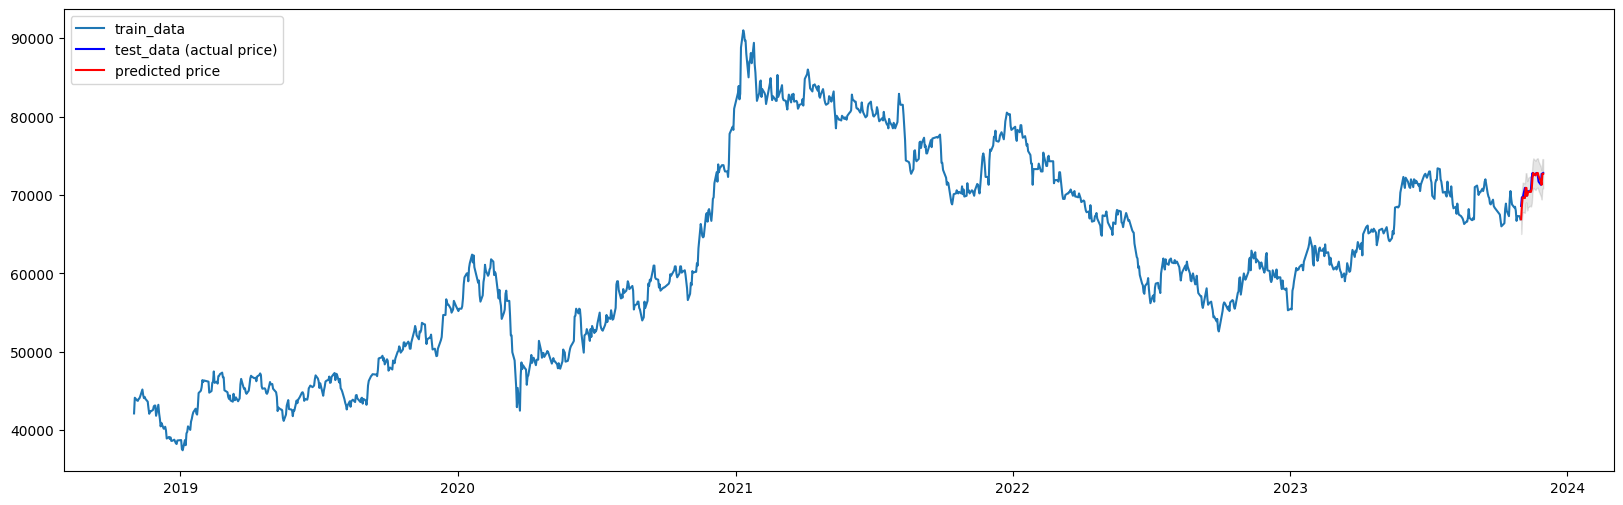

In [59]:
# Plot
plt.figure(figsize=(20,6))
plt.plot(train_data, label='train_data')
plt.plot(test_data, c='b', label='test_data (actual price)')
plt.plot(fc, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend(loc='upper left')
plt.show()

### ② 마지막 1달 예측 부분 시각화

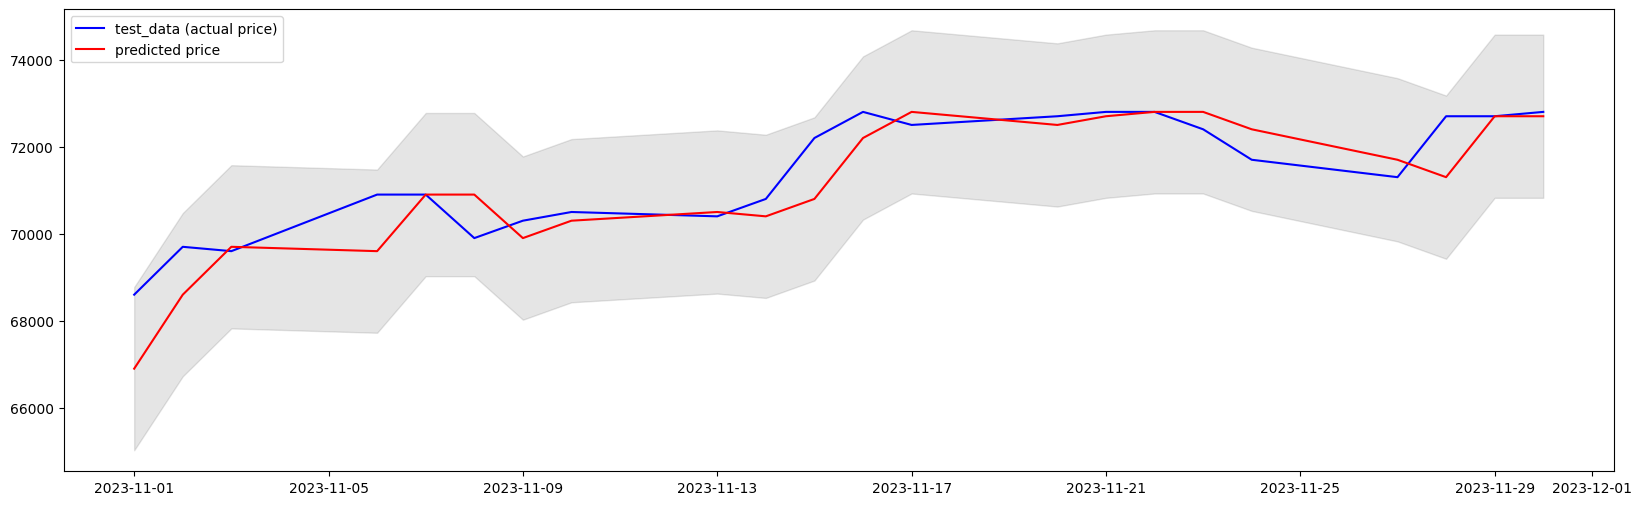

In [60]:
# FC Plot
plt.figure(figsize=(20,6))
plt.plot(test_data, c='b', label='test_data (actual price)')
plt.plot(fc, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend(loc='upper left')
plt.show()